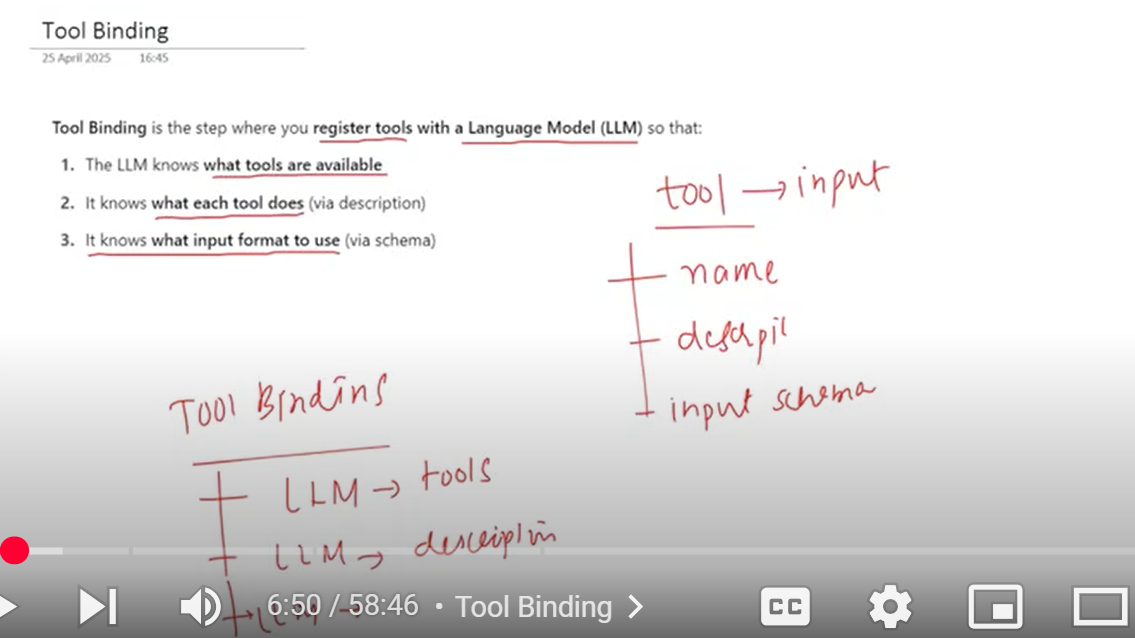

In [11]:
from langchain_community.tools import tool
from langchain_openai import ChatOpenAI
import requests



GROQ_API_KEY = "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"
llm = ChatOpenAI(
    api_key = GROQ_API_KEY,
    base_url="https://api.groq.com/openai/v1",  # Groq OpenAI-compatible endpoint
    model="llama3-8b-8192"
)


In [12]:
@tool
def multiply(a:int,b:int) ->int:
    """Multiply two numbers"""
    return a* b

In [14]:
llm_with_tools = llm.bind_tools([multiply])  # jitne tools dene dedo (kch llm he tools lete hain )

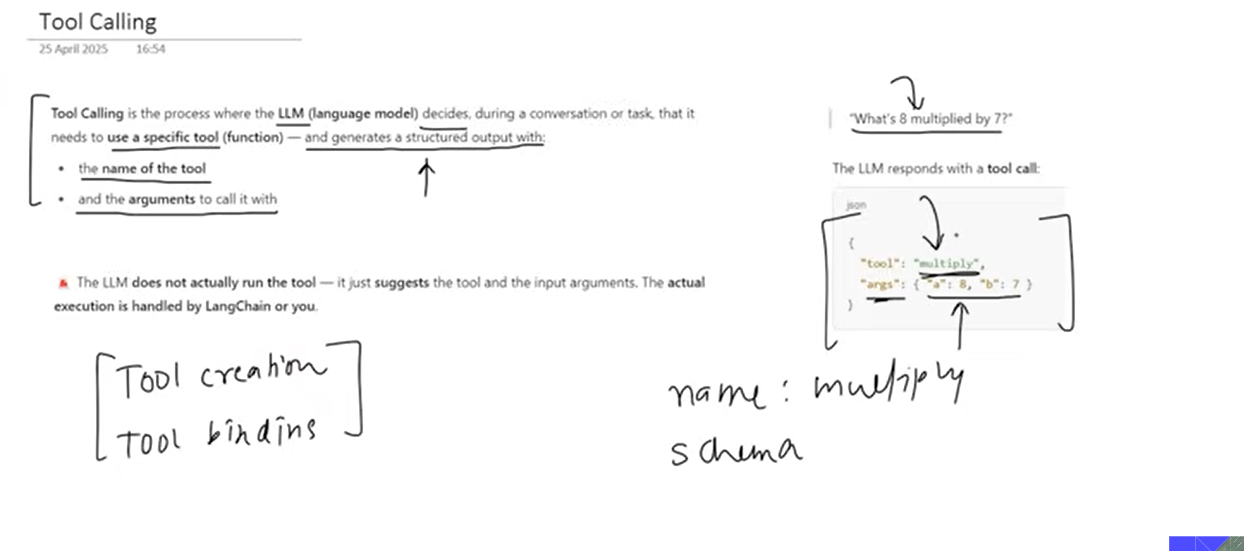

In [61]:
from langchain_core.messages import HumanMessage
querry = HumanMessage("what is 7 multiply with 9")
messages = [querry]
result = llm_with_tools.invoke(messages) # llm ne btaya ye tool use kr skhte 
# content is empty but see all atribute there s tool_calls
messages.append(result)
result

AIMessage(content='', additional_kwargs={'tool_calls': [{'id': 'qe2mhbwa8', 'function': {'arguments': '{"a":7,"b":9}', 'name': 'multiply'}, 'type': 'function'}], 'refusal': None}, response_metadata={'token_usage': {'completion_tokens': 72, 'prompt_tokens': 899, 'total_tokens': 971, 'completion_tokens_details': None, 'prompt_tokens_details': None, 'queue_time': 0.19454874, 'prompt_time': 0.101671272, 'completion_time': 0.131429336, 'total_time': 0.233100608}, 'model_name': 'llama3-8b-8192', 'system_fingerprint': 'fp_0fb809dba3', 'id': 'chatcmpl-f5a0202d-37bf-493f-afd3-f2a9d8ce7057', 'service_tier': 'on_demand', 'finish_reason': 'tool_calls', 'logprobs': None}, id='run--c41fcfa7-ed02-4024-9bf1-04491f8d7931-0', tool_calls=[{'name': 'multiply', 'args': {'a': 7, 'b': 9}, 'id': 'qe2mhbwa8', 'type': 'tool_call'}], usage_metadata={'input_tokens': 899, 'output_tokens': 72, 'total_tokens': 971, 'input_token_details': {}, 'output_token_details': {}})

- LLM tool run nhi krta hy bs wo btata hy name inut and which tool is helpful for that task langchainn or program khud tool call krta


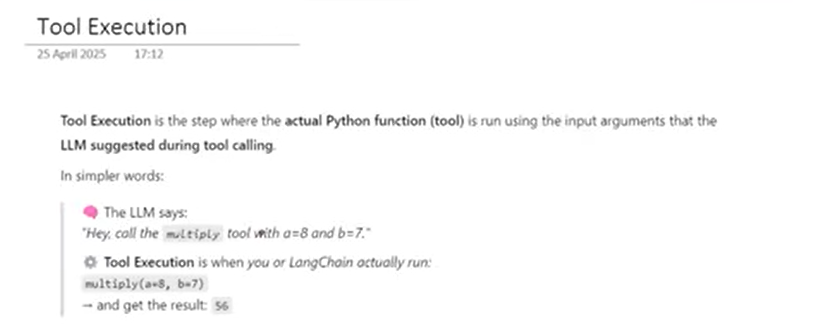


In [62]:
args= result.tool_calls[0]["args"]
multiply.invoke(args)  # see result mil rha asani se

63

In [63]:
# result.tool_calls[0]
tool_msg = multiply.invoke(result.tool_calls[0])  # rturns tool msg just like system msg hota ai msg human msg
messages.append(tool_msg)
tool_msg   # tools msg ko bhi messages me dal rha  

ToolMessage(content='63', name='multiply', tool_call_id='qe2mhbwa8')

In [64]:
messages

[HumanMessage(content='what is 7 multiply with 9', additional_kwargs={}, response_metadata={}),
 AIMessage(content='', additional_kwargs={'tool_calls': [{'id': 'qe2mhbwa8', 'function': {'arguments': '{"a":7,"b":9}', 'name': 'multiply'}, 'type': 'function'}], 'refusal': None}, response_metadata={'token_usage': {'completion_tokens': 72, 'prompt_tokens': 899, 'total_tokens': 971, 'completion_tokens_details': None, 'prompt_tokens_details': None, 'queue_time': 0.19454874, 'prompt_time': 0.101671272, 'completion_time': 0.131429336, 'total_time': 0.233100608}, 'model_name': 'llama3-8b-8192', 'system_fingerprint': 'fp_0fb809dba3', 'id': 'chatcmpl-f5a0202d-37bf-493f-afd3-f2a9d8ce7057', 'service_tier': 'on_demand', 'finish_reason': 'tool_calls', 'logprobs': None}, id='run--c41fcfa7-ed02-4024-9bf1-04491f8d7931-0', tool_calls=[{'name': 'multiply', 'args': {'a': 7, 'b': 9}, 'id': 'qe2mhbwa8', 'type': 'tool_call'}], usage_metadata={'input_tokens': 899, 'output_tokens': 72, 'total_tokens': 971, 'inpu

In [70]:
llm_with_tools.invoke(messages) # llm is not working properly bvz openai use nhi kr skhta wrna content me direct answer hota

AIMessage(content='63', additional_kwargs={'refusal': None}, response_metadata={'token_usage': {'completion_tokens': 2, 'prompt_tokens': 970, 'total_tokens': 972, 'completion_tokens_details': None, 'prompt_tokens_details': None, 'queue_time': 0.3669070569999999, 'prompt_time': 0.261151373, 'completion_time': 0.004124884, 'total_time': 0.265276257}, 'model_name': 'llama3-8b-8192', 'system_fingerprint': 'fp_0fb809dba3', 'id': 'chatcmpl-58cd9672-8096-4c08-a119-5fa38af6fefb', 'service_tier': 'on_demand', 'finish_reason': 'stop', 'logprobs': None}, id='run--6d02f59a-243e-4dad-9fe1-8ac7d0a9099c-0', usage_metadata={'input_tokens': 970, 'output_tokens': 2, 'total_tokens': 972, 'input_token_details': {}, 'output_token_details': {}})

In [71]:
messages
# end now currency convrsionn bnae gye 

[HumanMessage(content='what is 7 multiply with 9', additional_kwargs={}, response_metadata={}),
 AIMessage(content='', additional_kwargs={'tool_calls': [{'id': 'qe2mhbwa8', 'function': {'arguments': '{"a":7,"b":9}', 'name': 'multiply'}, 'type': 'function'}], 'refusal': None}, response_metadata={'token_usage': {'completion_tokens': 72, 'prompt_tokens': 899, 'total_tokens': 971, 'completion_tokens_details': None, 'prompt_tokens_details': None, 'queue_time': 0.19454874, 'prompt_time': 0.101671272, 'completion_time': 0.131429336, 'total_time': 0.233100608}, 'model_name': 'llama3-8b-8192', 'system_fingerprint': 'fp_0fb809dba3', 'id': 'chatcmpl-f5a0202d-37bf-493f-afd3-f2a9d8ce7057', 'service_tier': 'on_demand', 'finish_reason': 'tool_calls', 'logprobs': None}, id='run--c41fcfa7-ed02-4024-9bf1-04491f8d7931-0', tool_calls=[{'name': 'multiply', 'args': {'a': 7, 'b': 9}, 'id': 'qe2mhbwa8', 'type': 'tool_call'}], usage_metadata={'input_tokens': 899, 'output_tokens': 72, 'total_tokens': 971, 'inpu